# ZOMATO BANGLORE DATASET ANALYSIS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
del df['url']
del df['address']
del df['dish_liked'] #since more thna 50% of data is missing
del df['phone']

In [6]:
df = df.rename({'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'listed_in(city)':'city'}, axis=1)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.isnull().sum()

name               0
online_order       0
book_table         0
rate            7775
votes              0
location          21
rest_type        227
cuisines          45
cost             346
reviews_list       0
menu_item          0
type               0
city               0
dtype: int64

In [9]:
df['rate'].head()

0    4.1/5
1    4.1/5
2    3.8/5
3    3.7/5
4    3.8/5
Name: rate, dtype: object

In [11]:
df['rate']=df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])
df['rate'].value_counts().head()


nan    7775
NEW    2208
3.9    2098
3.8    2022
3.7    2011
Name: rate, dtype: int64

In [12]:
df['cost']=df['cost'].str.replace(',','')
df['cost']=df['cost'].astype(float)
df.cost.head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost, dtype: float64

In [13]:
df.describe()

,votes,cost
count,51717.000000,51371.000000
mean,283.697527,555.431566
std,803.838853,438.850728
min,0.000000,40.000000
25%,7.000000,300.000000
50%,41.000000,400.000000
75%,198.000000,650.000000
max,16832.000000,6000.000000


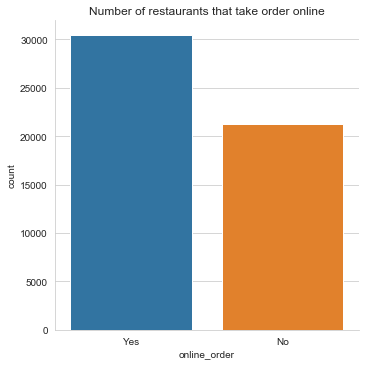

In [14]:
# plotting number of restaurtants that take online_order
 
x=sns.catplot(data = df, kind = 'count', x = 'online_order')
plt.title('Number of restaurants that take order online')
plt.show()

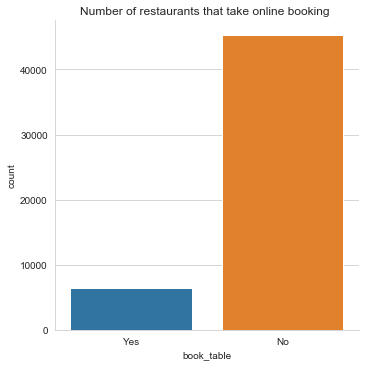

In [15]:
# plotting number of restaurtants that take online bookings for table
 
x=sns.catplot(data = df, kind = 'count', x = 'book_table')
plt.title('Number of restaurants that take online booking ')
plt.show()

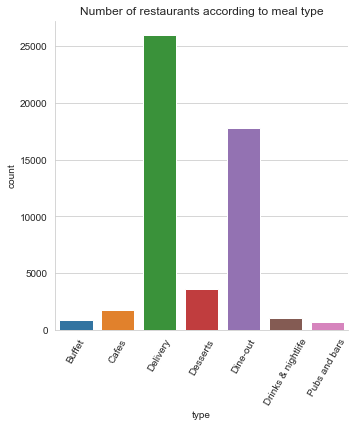

In [16]:
# plotting number of restaurants with meal type
  
g=sns.catplot(data = df, kind = 'count', x = 'type')
g.set_xticklabels(rotation=60)
plt.title('Number of restaurants according to meal type')
plt.show()

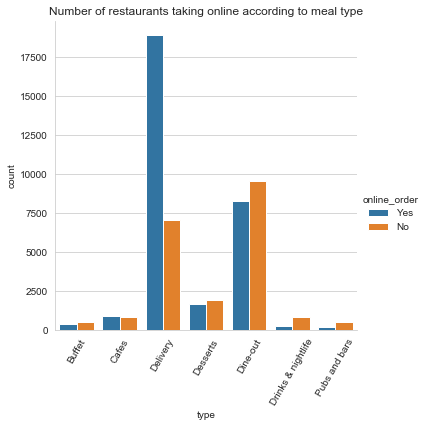

In [17]:
#plotting the number of restraunts taking online order according to meal type
g=sns.catplot(data = df, kind = 'count', x = 'type',hue='online_order')
g.set_xticklabels(rotation=60)
plt.title('Number of restaurants taking online according to meal type')
plt.show()

In [18]:
datafr=df.copy()
z = list(datafr['rate'])
for x in range(0, len(z)):
    if z[x] == '-' or z[x]=='NEW':
        z[x] = None
    else :
        z[x] = float(z[x])
datafr['rate'] = z

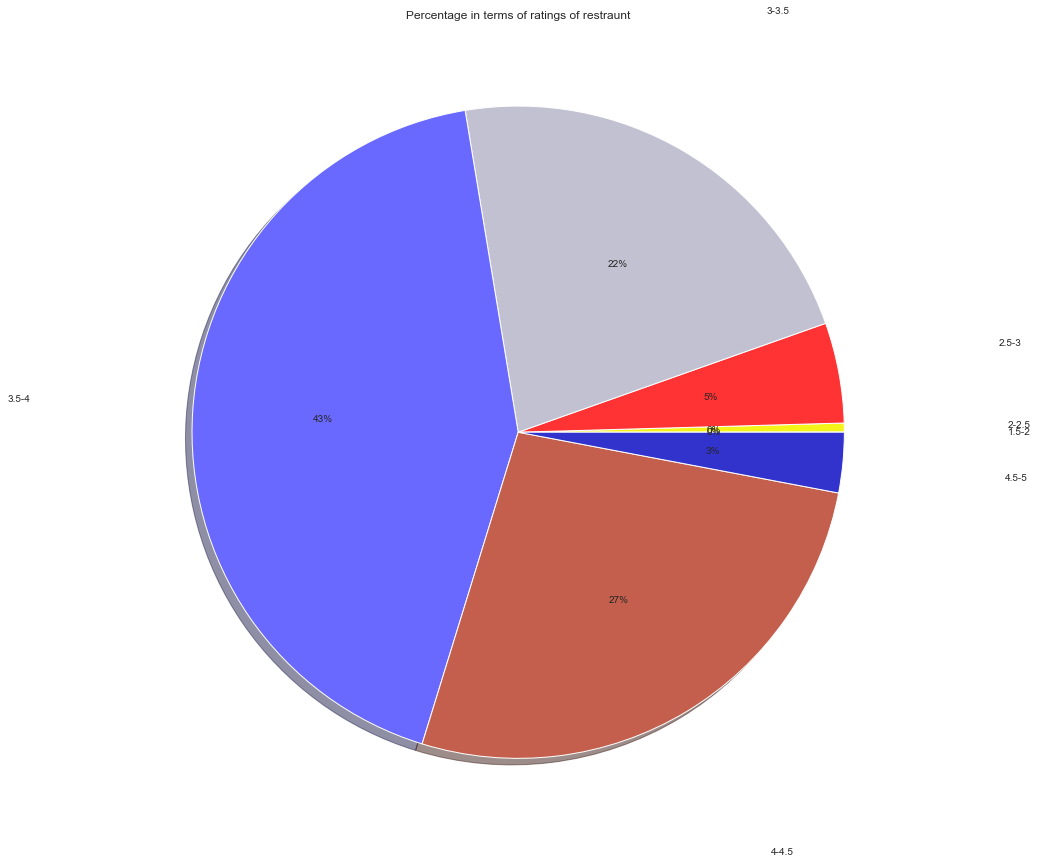

In [19]:
slices=[((datafr.rate>=1.5) & (datafr.rate<2)).sum(),
        ((datafr.rate>=2) & (datafr.rate<2.5)).sum(),
        ((datafr.rate>=2.5) & (datafr.rate<3)).sum(),
        ((datafr.rate>=3.0) & (datafr.rate<3.5)).sum(),
        ((datafr.rate>=3.5) & (datafr.rate<4)).sum(),
        ((datafr.rate>=4) & (datafr.rate<4.5)).sum(),
        ((datafr.rate>=4.5) & (datafr.rate<5)).sum()
       ]

labels= ['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
colors = ['#3233cc','#f5f41a','#ff3333','#c2c1d2','#6969ff','#c45f4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.6, labeldistance=1.5,shadow=True)
fig = plt.gcf()
plt.title("Percentage in terms of ratings of restraunt", bbox={'facecolor':'1', 'pad':4})

fig.set_size_inches(20,15)
plt.show()

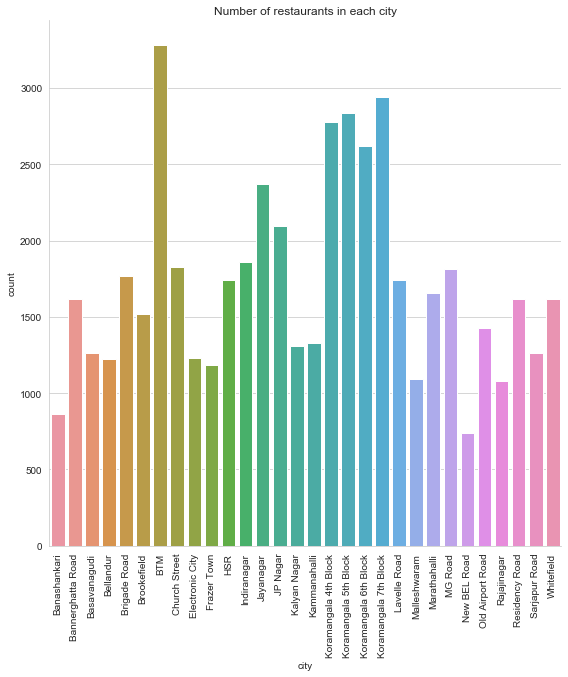

In [20]:

# plotting number of restaurants in each locality

b = sns.catplot(data = df, kind = 'count', x = 'city',height=8, aspect=1)
plt.title('Number of restaurants in each city')
b.set_xticklabels(rotation = 90)
plt.show()

Text(0.5, 1.0, 'NO. of restaurants in a Location')

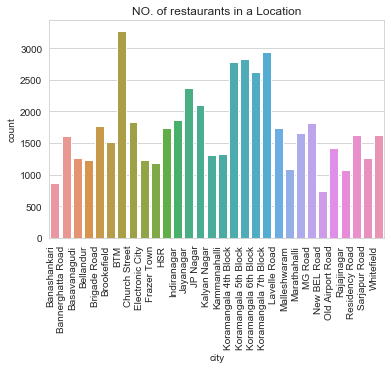

In [21]:
#NO. of restaurants in a Location',

loc = sns.countplot(x="city",data=df)
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.title('NO. of restaurants in a Location')


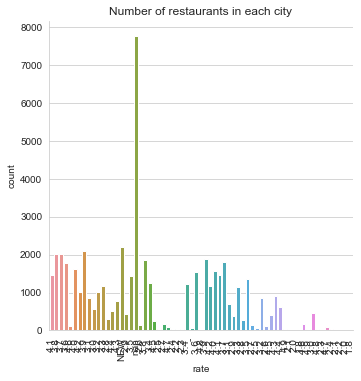

In [22]:

# plotting number of restaurants for each rating

b = sns.catplot(data = df, kind = 'count', x = 'rate')
plt.title('Number of restaurants in each city')
b.set_xticklabels(rotation = 90)
plt.show()